In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import statsmodels.api as sm 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
dataset = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

* **ID** : Customer ID
* **Age** : Customer's age in completed years
* **Experience** : #years of professional experience
* **Income** : Annual income of the customer (000)
* **ZIP Code** : Home Address ZIP code.
* **Family** : Family size of the customer
* **CCAvg** : Avg. spending on credit cards per month (000)
* **Education** : Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
* **Mortgage** : Value of house mortgage if any. (000)
* **Personal Loan** : Did this customer accept the personal loan offered in the last campaign?
* **Securities Account** : Does the customer have a securities account with the bank?
* **CD Account** : Does the customer have a certificate of deposit (CD) account with the bank?
* **Online** : Does the customer use internet banking facilities?
* **Credit card** : Does the customer use a credit card issued byUniversalBank?


In [4]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Dataset shape

In [5]:
dataset.shape

(5000, 14)

# Check datatype

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Correlation

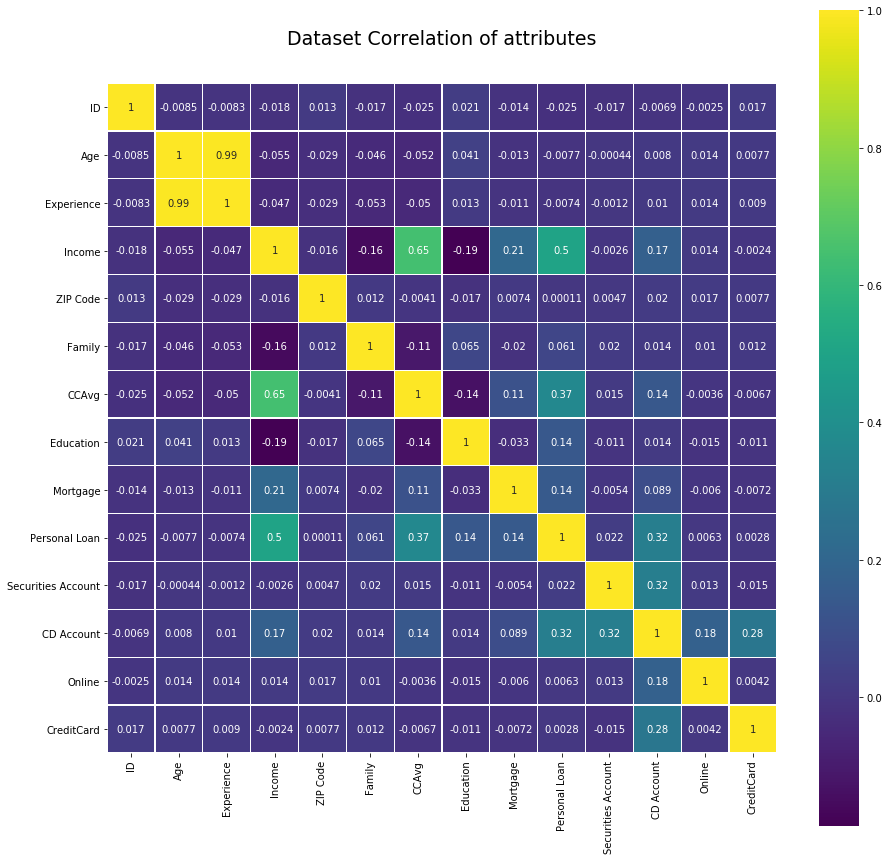

In [7]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Dataset Correlation of attributes', y=1.05, size=19)
sns.heatmap(dataset.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## There is no strong correlation between any two variables.
## There is no strong correlation between any independent variable and class variable.

# Detection of null data.

In [8]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
dataset.isnull().values.any()

False

#### **There is no empty value in the data set.**

# Data distribution in each feature and target variable.

In [10]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# The amount of unique values in each column.

In [11]:
dataset.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Unique values in each column.

In [12]:
for col in dataset.columns:
    print(col + ' Col Unique values: ', dataset[col].unique(), '\n\n')

ID Col Unique values:  [   1    2    3 ... 4998 4999 5000] 


Age Col Unique values:  [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23] 


Experience Col Unique values:  [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43] 


Income Col Unique values:  [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 

# Number of people with zero mortgage

In [13]:
zero_mortgage = 0
for zero in dataset['Mortgage']:
    if zero == 0:
        zero_mortgage += 1
print('Number of people with zero mortgage ', zero_mortgage)

Number of people with zero mortgage  3462


# Number of people with zero credit card spending per month

In [14]:
cc_avg = 0
for avg in dataset['CCAvg']:
    if avg == 0:
        cc_avg += 1
print('Number of people with zero credit card spending per month: ', cc_avg)

Number of people with zero credit card spending per month:  106


### **Categorical columns in the dataset:**

* **Personal Loan**


* **Securities Account**


* **CD Account**


* **Online Col**


* **CreditCard**

### **Value counts of all categorical columns:**

In [15]:
categorical_col = ['Personal Loan', 'Securities Account', 'CD Account', 'Online Col', 'CreditCard']

for col in categorical_col:
    val = 0
    for value in col:
        val += 1
    print('Value count of ' + col + ':', val)

Value count of Personal Loan: 13
Value count of Securities Account: 18
Value count of CD Account: 10
Value count of Online Col: 10
Value count of CreditCard: 10


# Univariate 
* **Age Column**

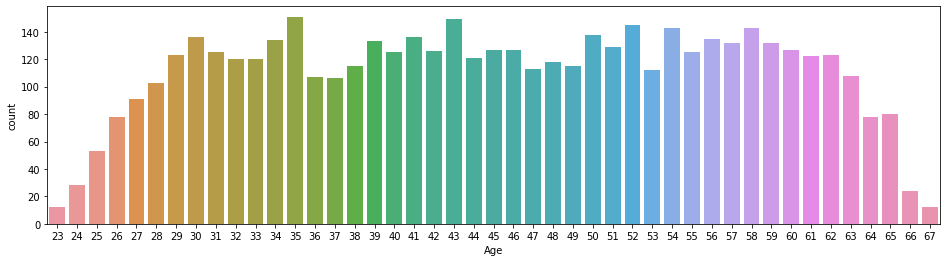

In [16]:
plt.figure(figsize=(16,4))
sns.set_color_codes()
sns.countplot(dataset["Age"])

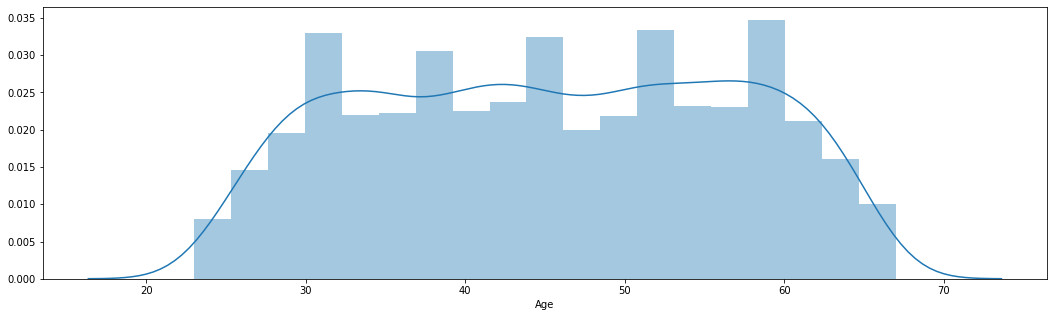

In [17]:
plt.figure(figsize=(18,5))
sns.set_color_codes()
sns.distplot(dataset["Age"])

# Bivariate
* **Age and Personal Loan**

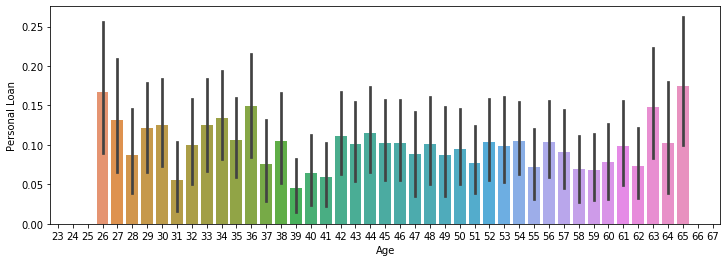

In [18]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.barplot(dataset["Age"],dataset["Personal Loan"])

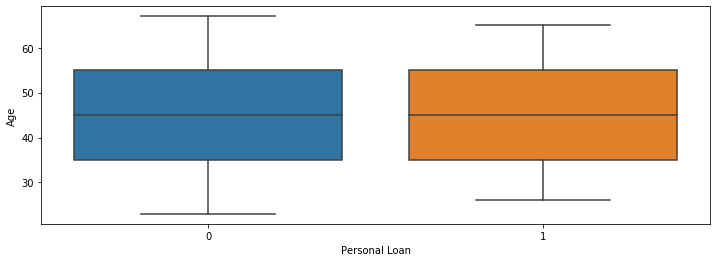

In [19]:
plt.figure(figsize=(12,4))
sns.set_color_codes()
sns.boxplot(y=dataset["Age"],x=dataset["Personal Loan"])

In [25]:
X = dataset.drop(columns = ['ID', 'Personal Loan'])
y = dataset['Personal Loan']

# Best features 

In [26]:
kbest = SelectKBest(k=5)
k_best_features = kbest.fit_transform(X, y)
list(dataset.columns[kbest.get_support (indices=True)])

['Experience', 'Family', 'CCAvg', 'Education', 'Personal Loan']

In [27]:
dataset.corrwith(dataset["Personal Loan"]).abs().nlargest(5)

Personal Loan    1.000000
Income           0.502462
CCAvg            0.366889
CD Account       0.316355
Mortgage         0.142095
dtype: float64

In [28]:
X = dataset.drop(columns = ['ID','Age','Experience','ZIP Code', 'Family', 'Education','Personal Loan','Securities Account', 'Online','CreditCard']).values
y = dataset['Personal Loan'].values

In [29]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Dividing the dataset

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scaling

In [31]:
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

# Modelling

* **A small function for easier and easier use of the model. It can make your work quite easy when using more than one model.**

In [32]:
def model_evaluate(model, test):
    y_pred = model.predict(test)
    print('Metrics: \n', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, cmap = 'Blues', fmt = '', annot = True)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

* **Logistic Regression**

Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1372
           1       0.63      0.45      0.52       128

    accuracy                           0.93      1500
   macro avg       0.79      0.71      0.74      1500
weighted avg       0.92      0.93      0.92      1500



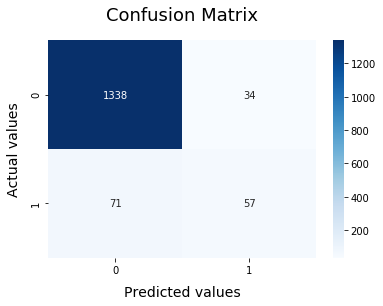

In [33]:
model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

model_evaluate(model, x_test)

* **Support Vector Classifier**

Metrics: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      1372
           1       0.72      0.27      0.39       128

    accuracy                           0.93      1500
   macro avg       0.83      0.63      0.68      1500
weighted avg       0.92      0.93      0.91      1500



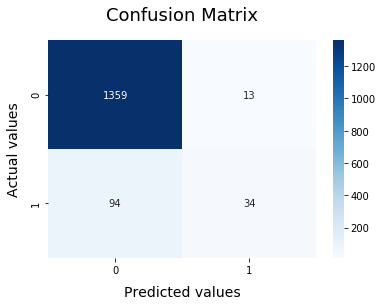

In [34]:
model = SVC(kernel = 'rbf') #kernel = poly, rbf, precomputed
model.fit(X_train, y_train)

model_evaluate(model, X_test)

* **KNeighbors Classifier**

Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1372
           1       0.63      0.41      0.49       128

    accuracy                           0.93      1500
   macro avg       0.79      0.69      0.73      1500
weighted avg       0.92      0.93      0.92      1500



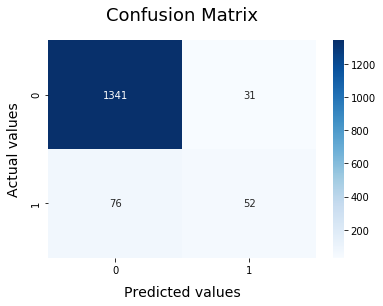

In [35]:
model = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
model.fit(X_train, y_train)

model_evaluate(model, X_test)

* **Gaussian Naive Bayes**

Metrics: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1372
           1       0.37      0.61      0.46       128

    accuracy                           0.88      1500
   macro avg       0.67      0.76      0.70      1500
weighted avg       0.91      0.88      0.89      1500



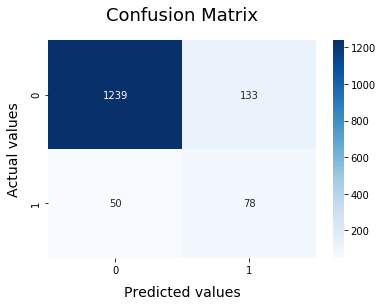

In [36]:
model = GaussianNB()
model.fit(X_train, y_train)

model_evaluate(model, X_test)

* **XGBoost Classifier**

Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1372
           1       0.58      0.50      0.54       128

    accuracy                           0.93      1500
   macro avg       0.77      0.73      0.75      1500
weighted avg       0.92      0.93      0.92      1500



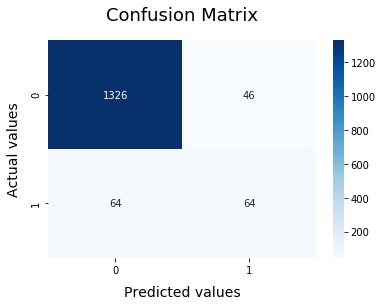

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

model_evaluate(xgb, X_test)

In [38]:
crossVal= cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print('XGBoost Accuracy: ', crossVal.mean())
print('XGBoost Std: ', crossVal.std())


XGBoost Accuracy:  0.9225714285714284
XGBoost Std:  0.012742344640558725


In [39]:
skf = StratifiedKFold(n_splits=10)
scores = cross_val_score(xgb, X_train, y_train, cv=skf)
print("scores:\n{}".format(scores))
print("average score:\n{}".format(scores.mean()))

scores:
[0.91428571 0.93714286 0.93428571 0.94       0.93714286 0.90285714
 0.91428571 0.90857143 0.92       0.91714286]
average score:
0.9225714285714284


In [41]:
params = [{'learning_rate':[0.1,0.01],
           'colsample_bytree':[1,3],
           'gamma':[0,1],
           'reg_alpha':[2,3],
           'reg_lambda':[1,2,4,16],
           'n_estimators':[50,100,150],
           'colsample_bylevel':[1,2],
           'missing':[False, True],
           'subsample':[1,2],
           'base_score':[0.2,0.5]
           }
    ]

gs = GridSearchCV(estimator = xgb,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 10,
                  n_jobs = -1)
grid_search = gs.fit(x_train, y_train)
best_result = grid_search.best_score_
best_params = grid_search.best_params_
print('Best_Result', best_result)
print('Best_Params', best_params)

Best_Result 0.9242857142857142
Best_Params {'base_score': 0.2, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'missing': True, 'n_estimators': 150, 'reg_alpha': 3, 'reg_lambda': 1, 'subsample': 1}


Metrics: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1372
           1       0.67      0.47      0.55       128

    accuracy                           0.93      1500
   macro avg       0.81      0.72      0.76      1500
weighted avg       0.93      0.93      0.93      1500



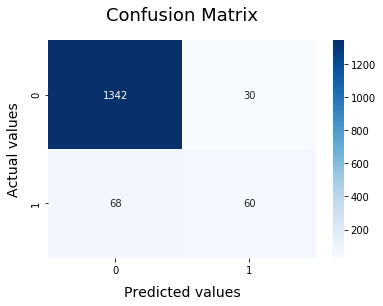

In [42]:
xgb = XGBClassifier(base_score = 0.2, colsample_bylevel = 1, colsample_bytree = 1, gamma = 0, learning_rate = 0.1, missing = True, n_estimators = 150, reg_alpha = 3, reg_lambda = 1, subsample = 1)
xgb.fit(X_train, y_train)

model_evaluate(xgb, X_test)

# Conclusion

* **The bank's expectation from the dataset is to take out loans to its debtor customers and turn them into loan customers. Therefore, it is desired to create a new marketing campaign by making inferences about the connection between the variables.**

* **It seems that the XGBoost algorithm successfully accomplishes the necessary correlation.**
